In [1]:
import cv2
import cv_exp.basic
import cv_exp.basic as cv
import cv_exp.pupil_detection as pupil_detection
import cv_exp.draw as draw
import cv_exp.log as log
import cv_exp.take as take
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import os
from PIL import Image
import pandas as pd
from scipy.cluster.vq import kmeans, vq
import matplotlib.pyplot as plt
import plotly.express as px


model_face_detection = '/home/roopesh/Desktop/MediaPipe_new_cv_exp/cv-exp-framework-master/data/models/face_detection_front.tflite'
model_face_landmarks ='/home/roopesh/Desktop/MediaPipe_new_cv_exp/cv-exp-framework-master/data/models/face_landmark.tflite'
model_iris_landmarks = '/home/roopesh/Desktop/MediaPipe_new_cv_exp/cv-exp-framework-master/data/models/iris_landmark.tflite'

iris_detector = pupil_detection.IrisDetectorMP(model_face_detection_path=model_face_detection,
                                                   model_face_landmarks_path=model_face_landmarks,
                                                   model_iris_landmarks_path=model_iris_landmarks)

# def Mediapipe_Iris_Color(path):
#     '''
#     This function takes the image in path and Using Mediapipe calculates the Annular Mask of the images,
#     then calculates the HSV color of Annular mask.
#     and returns the dominant Iris colour percentage in a data frame.
#     '''

path='/home/roopesh/Desktop/New_Corpus/Brown/front (3).jpg'

image = cv2.imread(path)
image_bgr_rgb = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)  # converting from BGR to RGB
out_ = image_bgr_rgb.copy()
out_pupile_ = image_bgr_rgb.copy()
result = iris_detector.detect(image_bgr_rgb)

if not result is None:

    detected_pupils = result.detected_pupils,
    face_rect_detection = result.face_rect_detection_from_landmarks,
    face_rect_landmarks = result.face_rect_from_landmarks,
    face_landmarks = result.face_landmarks,
    face_rect_detection_from = result.face_rect_from_detection,
    face_landmarks_from_detection = result.face_landmarks_from_detection,
    left_iris_landmarks = result.left_iris_landmarks,
    left_eyelid_landmarks = result.left_eyelid_landmarks,
    right_iris_landmarks = result.right_iris_landmarks,
    right_eyelid_landmarks = result.right_eyelid_landmarks,
    left_iris_segmentation = result.left_iris_segmentation,
    right_iris_segmentation = result.right_iris_segmentation,
    eyes_landmarks = result.eyes_landmarks

    # drawing

    # out_pupile_ = draw.draw_pupils(out_pupile, result.detected_pupils.left, result.detected_pupils.right, color_center = (255, 255, 255), color_contour = (255, 255, 255))
    # out_pupile_ = draw.draw_rect(out_pupile_, result.face_rect_detection_from_landmarks, thickness=6, color=(255, 0, 0))
    # out_pupile_ = draw.draw_list_pointd(out_pupile_, result.left_iris_landmarks,radius=6,color = (255, 255, 255))
    # out_pupile_= draw.draw_contour(out_pupile_, result.left_iris_segmentation,  thickness=1,color=(0, 0, 255))
    # out_pupile_ = draw.draw_list_pointd(out_pupile_, result.left_eyelid_landmarks,radius=6,color = (255, 0, 0))

    # Extraction of specific Points From Left Iris Landmarks (0,1) : Left Iris from Coder's Point of view

    left_iris_tuple_of_tuple_Tolist = ([PointD_elements for PointD in left_iris_landmarks for PointD_elements in PointD])
    left_iris_points = [(pointD.x, pointD.y) for pointD in left_iris_tuple_of_tuple_Tolist]

    center_point_LeftIris=(np.round(left_iris_points[0]))
    for left_center_x,left_center_y in [center_point_LeftIris]:
         lx, ly = left_center_x,left_center_y

    left_point_LeftIris=(np.round(left_iris_points[1]))
    for leftIris_left_x,LeftIris_left_y in [left_point_LeftIris]:
        LIL_x, LIL_y = leftIris_left_x, LeftIris_left_y

    right_point_LeftIris=(np.round(left_iris_points[3]))
    for rightIris_x,rightIris_y in [right_point_LeftIris]:
        RIL_x, RIL_y = rightIris_x, rightIris_y

    Top_point_LeftIris=(np.round(left_iris_points[2]))
    for TopIris_x,TopIris_y in [Top_point_LeftIris]:
        TI_x, TI_y = TopIris_x, TopIris_y

    Bottom_point_LeftIris=(np.round(left_iris_points[4]))
    for BottomIris_x,BottomIris_y in [Bottom_point_LeftIris]:
        BI_x, BI_y = BottomIris_x, BottomIris_y
        






2022-04-07 10:13:36.761810: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2022-04-07 10:13:42.405204: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2022-04-07 10:13:42.438682: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-07 10:13:42.438933: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:09:00.0 name: NVIDIA GeForce RTX 2080 Ti computeCapability: 7.5
coreClock: 1.545GHz coreCount: 68 deviceMemorySize: 10.76GiB deviceMemoryBandwidth: 573.69GiB/s
2022-04-07 10:13:42.438993: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so retur

In [2]:
# Distance Formula to calculate the distance between center to left_Iris_ points to get radius of iris
distance_left_iris_center = np.sqrt((lx - LIL_x) ** 2 + (ly - LIL_y) ** 2)

# First Circular mask for entire iris

mask = np.zeros(out_pupile_.shape, dtype=np.uint8)      # Result from Mediapipe added here.
center= (int(lx),int(ly))
radius = (int((distance_left_iris_center) * 0.80))
left_mask = cv2.circle(mask, center, radius,[255,255,255], -1 )
result = cv2.bitwise_and(out_pupile_, left_mask)
result[mask == 0] = 255                                 # adding background Color- white

# cropping iris area from the first circular masked image

x= int((RIL_x)+3)       # x-axis --Landmarks points from top- right point from left iris, +3 for adjusting the size
y= int((TI_y)+3)        # y-axis --Landmarks points from top_ left of left iris, +3 for adjusting the size
h= int(radius*2.35)-3   # height --Radius of iris times 2.35 for adjustment,-3 for adjustment
w=int(radius*2.35)    # width  --Radius of iris times 2.35 for adjustment, -1 for adjustment
crop = result[y:y+h, x:x+w]

# second Circular mask to take inner pupil area alone

mask1 = np.zeros(out_pupile_.shape, dtype=np.uint8)     # Result from Mediapipe added here for second mask.
center1= (int(lx),int(ly))
radius1 = (int((distance_left_iris_center)* 0.50))      # to scrap pupil area and other reflection area
left_mask1 = cv2.circle(mask1, center1, radius1, (255, 255, 255), -1 )
result1 = cv2.bitwise_and(out_pupile_, left_mask1-255)  # subtracting white region over masked area
result1[mask1==0] = 255                                 # adding background Color- white

# Cropping the inner pupil area from the second circular masked image (size should be same as the first masked and cropped result )

x= int(RIL_x)+3         # x-axis --Landmarks points from top- right point from left iris, +3 for adjusting the size
y= int(TI_y)+3          # y-axis --Landmarks points from top_ left of left iris, +3 for adjusting the size
h= int(radius*2.35)-3   # height --Radius of iris times 2.35,-3 for adjustment
w=int(radius*2.35)    # width  --Radius of iris times 2.35, -1 for adjustment
crop1 = result1[y:y+h, x:x+w]

# Bitwise and operation to omit the inner pupil alone and take the rest of the iris area

adding_both_cropped_image = cv2.bitwise_and(crop, crop1)

# Removing NOISE from the Adding_both_cropped_image (<=10,  >=240) in all channel

final_result = np.array(adding_both_cropped_image)
mask = np.all(final_result <= [10, 10, 10], axis=2)
final_result[mask] = [0, 0, 0]
mask = np.all(final_result >= [240, 240, 240], axis=2)
final_result[mask] = [0, 0, 0]
annular_result = final_result                   # the final result of the iris area from mediapipe

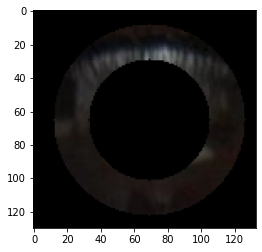

In [3]:
plt.imshow(final_result)     

In [4]:
final_result.shape[:2]

(130, 133)

In [5]:
x,y=final_result.shape[:2]
x,y
# finding center points 
cx,cy=(x//2,y//2)
print(cx,cy)
# finding top points
x//2

65 66


65

In [6]:
# 4 quadrants split

top_left=final_result[0:cy,0:cx]
top_right=final_result[0:cy,0:cx]
bottom_left=final_result[cy:h,0:cx]
bottom_right=final_result[cy:h,cx:w]

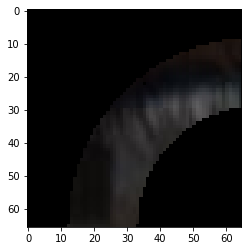

In [7]:
plt.imshow(top_left)

# Horizontal Split

#  Top

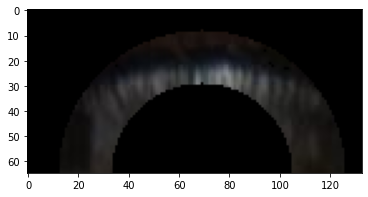

In [8]:
half=x//2
top_third_= x//3
top=final_result[:half]
plt.imshow(top)

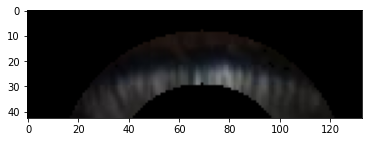

In [9]:
top_third_= x//3
top1=final_result[:top_third_]
plt.imshow(top1)

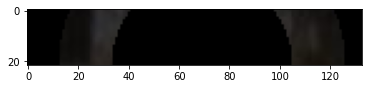

In [10]:

top_3=final_result[top_third_:half]
plt.imshow(top_3)

# Bottom

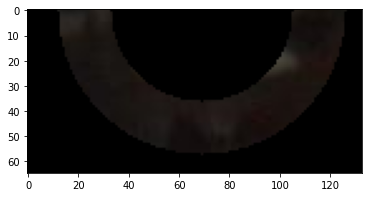

In [11]:
bottom=final_result[half:]
plt.imshow(bottom)

In [12]:
x1,y1=bottom.shape[:2]
x1,y1

(65, 133)

In [13]:
bottom_third=x1//3
bo_3=bottom[:bottom_third]
plt.imshow(bo)

NameError: name 'bo' is not defined

In [ ]:
half1=x1//3
bo=bottom[half1:]
plt.imshow(bo)

# Combining top_third + bottom_third

In [ ]:
# try-1 using opencv vconcat

top_3,bo_3=(np.array(top_3),np.array(bo_3))
combine=cv2.vconcat(top_3,bo_3)
combine
plt.imshow(combine)

In [ ]:
# try-2 using numpy.vstack 
com=np.vstack((top_3,bo_3))
plt.imshow(com)

In [ ]:
lis=[]
lis.append(top1)
lis.append(bo)
lis.append(com)

In [14]:
dict1=dict()

dict1['Upper_Third']=(top1)
dict1['Middle_Third']=(com)
dict1['Lower_Third']=(bo)
dict1.keys()
# dict1.values()

NameError: name 'com' is not defined

In [15]:
k=dict1.keys()
v=dict1.values()
for k,v  in dict1.items():
    print(k)

Upper_Third


In [17]:

def rgb_to_hsv(r, g, b):
    '''
    Convert RGB to HSV
    returns h,s,v
    '''

    r, g, b = r/255.0, g/255.0, b/255.0
    mx = max(r, g, b)
    mn = min(r, g, b)
    df = mx-mn
    if mx == mn:
        h = 0
    elif mx == r:
        h = (60 * ((g-b)/df) + 360) % 360
    elif mx == g:
        h = (60 * ((b-r)/df) + 120) % 360
    elif mx == b:
        h = (60 * ((r-g)/df) + 240) % 360
    if mx == 0:
        s = 0
    else:
        s = (df/mx)*100
    v = mx*100
    return h, s, v



for k, v in dict1.items():
    pil_image = Image.fromarray(v)     # input from the annular_result read as array
    imarray = np.array(pil_image.getdata())
    df = pd.DataFrame(imarray, columns=['RED', 'GREEN', 'BLUE'])
    df = pd.DataFrame(df[(df['RED'] >= 50) | (df['GREEN'] >= 50) | (df['BLUE'] >= 50)])  # For value greater than 50

# K-Means Clustering using Scipy

    cluster_size = 3
    cluster_centers, _ = kmeans(df.values.astype(float), cluster_size)
    index, _ = vq(df.values.astype(float), cluster_centers)
    count = np.bincount(index)
    sum = np.sum(count)
    i, Blue, Green, Brown,Other = 0, 0, 0, 0, 0
    for row in cluster_centers:
        r = row[0]
        g = row[1]
        b = row[2]
        h, s, v = rgb_to_hsv(r, g, b)   # calling the function to convert RGB to HSV
        percent = count[i]*100/sum
        if h >= 170 and h < 270:
            Blue += percent
        elif h >= 60 and h < 170:
            Green += percent
        elif h >= 300 or h < 40:
            Brown += percent
        else:
            Other += percent
        i+=1

# Results of Dominant Color Detection in dataframe
  

    data = [[path, str(k), int(Blue), int(Green), int(Brown), int(Other)]]
    dominantColour_ = pd.DataFrame(data, columns=['File_name :', 'Image Position :', 'Blue % :', 'Green % :', 'Brown % :','Other % :']).T

print(dominantColour_)


                                                                  0
File_name :       /home/roopesh/Desktop/New_Corpus/Brown/front (...
Image Position :                                        Upper_Third
Blue % :                                                        100
Green % :                                                         0
Brown % :                                                         0
Other % :                                                         0
